<a href="https://colab.research.google.com/github/meshalalsultan/Tensoflow/blob/main/Regression_With_TensorFlow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This NoteBook To Try to build a Regression Model With TensorFlow , I try to make a full model from scratch to sout problem in hand ( will see it after ) , My plan to do it by :

1. Build small model with rndom data .
2. Build 3 Models with Miner change to hypertune and chose the best model to .
3. Build Model with Real Data .

In [ ]:
# Get the TensorFlow
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
# Make the random data

x = np.arange(-100,100,4)
x

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
y= np.arange(-90,110,4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
x.shape

(50,)

Split The data to training and test 

In [ ]:
len(x)

50

In [ ]:
x_train = x[:40] #get 80% of x data
y_train = y[:40] 

x_test = x[40:]
y_test = y[40:] #Get the 10% to test 

len(x_train), len(x_test)

(40, 10)

## Visulaize The Data

In [ ]:
import matplotlib.pyplot as plt

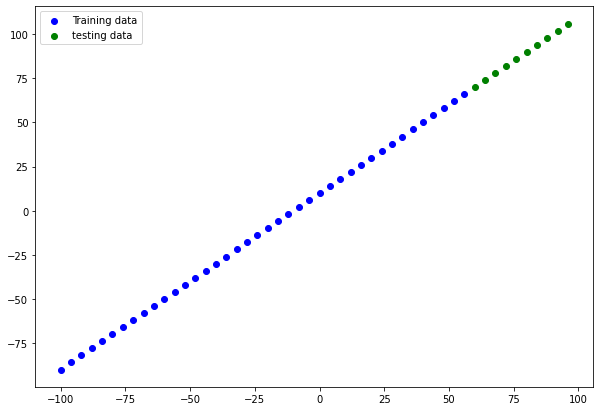

In [ ]:
plt.figure(figsize=(10,7))
#plt the training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')

#plot the test data in green
plt.scatter(x_test, y_test, c='g', label='testing data')
#Show the legend
plt.legend()

# Build the Model 

In [ ]:
# Ste the random seed
tf.random.set_seed(42)

# Cretae a Model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

For Now all we need to think of this parameters is that theier learnable pattren in data.


**Lets Fit the model**

In [ ]:
# Fit the model to the trainig data

model.fit(x_train, y_train, epochs=100, verbose=0) #verbose controles how much gets output

In [ ]:
#Now let's check the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling Summary() on our model showes us the layers it contains, the output shape and the number of parameters .

**Total params** - total number of parameters in the model.

**Trainabel parameters** - these are the parameters (pattren) the model can update as it trains

**Non-Training parameters** - these parameters aren't updated during training (this is typacaliy when you bring in the alrady learnind pattrens from other models during transfer learning)

# Visulize the Predection

Now we've got a trained model, let's visulize some predections.

To visulize predection, its always a good idea to plot them againest truth labels.

Often you'll see this in the form of y_test vs y_pred (ground truth vs predection).

First, We'll make some predection on the test data(x_test).

In [ ]:
#Make Predection
y_pred = model.predict(x_test)

In [ ]:
# View the predection
y_pred

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

Ok, we get a list of numbers but how these compare to the ground truth labels?

Let's build a plotting function to find out .



In [ ]:
def plot_pred(train_data=x_train,
              train_labels=y_train,
              test_data=x_test,
              test_labels=y_test,
              predection=y_pred):
  '''
  Plot training data, test data and compare a Predection
  '''
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label= 'Trainnig data')
  #Plot test data in green
  plt.scatter(test_data, test_labels, c='g',label='Testing data')
  #Plot the predection in red (predections were made on the test data)
  plt.scatter(test_data, predection, c='r', label='Predections')
  #Show the legend
  plt.legend();

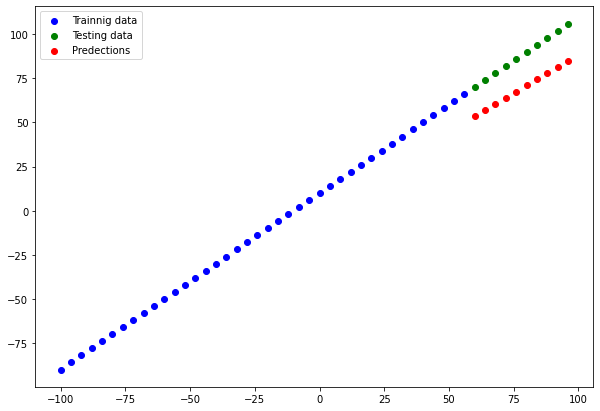

In [ ]:
plot_pred(train_data=x_train,
          train_labels=y_train,
          test_data=x_test,
          test_labels=y_test,
          predection=y_pred)

From the plot we can see our predection aren't totaly outlandish but they definitely aren't anythings special either.

# Evaluting Predections

Alongside visulization, evaulations metrix are your alternative best option for evaluating the model.

Depending on the problem we are working on , diffrint models have diffrint evaluation  metrics.

There are two of the main metrics used for regression problems :

1. **Mean absolute error (MAE)** - The mean diffrince between eatch of the predections.

2. **Mean squared error (MSE)** - the squaired mean diffrince between of the predection  (use if larger error are more detrimental than samller error).

### The Lower eatch of these values, **THE BETTER**


You can also use `model_evaluate()`. witch will return the loss of the model as well as many metrics setup during the compile step.

In [52]:
#Evalute the model on the test set
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 133ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In our case, since we used MAE for the `loss function` as well as MAE for the metrics, `model.evalute()` return them both.

TensorFlow also has built in function for `MSE` and `MAE`

For many evaluation function, the premise is the same:
**compare predection to the ground truth labels.

In [53]:
#Calculate the mean absloutse error
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

**MAE Must be Singel output**

Instead, we get 10 values.

This is because our `y_test` and `y_pred` tensor are diffrint shapes.

In [54]:
#Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [55]:
#Check the predection tensor values (notice the extra squre brackets)
y_pred

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [56]:
#check the tensor shape
y_test.shape, y_pred.shape

((10,), (10, 1))


## Dealing with input and output shape is one the most common issues.

We can fix it using `squeeze()`, it will remove the 1 dimension from our y_pred tensor, making it the same shape as y_test.

In [57]:
#Shape before squeeze()
y_pred.shape

(10, 1)

In [59]:
#Shape after squeez()
y_pred.squeeze().shape

(10,)

In [60]:
#What are the Result Now 
y_test, y_pred.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32))

Now our y_test and y_pred tensor in the name shape, let's use our evaluation metrics.

In [62]:
#Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred.squeeze()) #use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [64]:
#Clacultate the MSE
mse = tf.metrics.mean_squared_error(y_true= y_test , y_pred= y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

## Make function for our evaluation metrics.

In [65]:
def mae(y_test,y_pred):
  '''
  calculate mean absolute error between y_test and y_preds.
  '''
  return tf.metrics.mean_absolute_error(y_test,y_pred)

In [66]:
def mse(y_test,y_pred):
  '''
  Calculate mean squared error between y_test and y_pred.
  '''
  return tf.metrics.mean_squared_error(y_test,y_pred)

# Imporiove The Model

### Running Expirimintal to imporove the Model

There are Many Diffrent way ti improve the model , i will choose 3 of them.

1.**Get more data** - get more exampel for your model to train on (more opportunities to learn pattren).

2.**Make the model larger (use more complex model)** - more layers or more hiddin unites in neatch layer.

3.**Train for longer** - giving the model more of chance to find the pattren in the data.


Since we cretaed our dataset , we could easily make more data but this isn't alwayes the case when we work in real-world dataset.

So I will using 2 and 3 .

I will build 3 model and comapire their result :

1. `model_1` -same as original model, 1 layer, treind for 100 epochs.

2. `model_2` - 2 Layers , traind for 100 epochs.

3. `model_3` - 2 layer, traind for 500 epochs.

#Build The Models 

## Build `Model_1`

In [70]:
#Set random seed
tf.random.set_seed(42)

#The orginal Model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model 
model_1.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['mae'])

# Fit the model
model.fit(x_train, y_train , epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 7.4494 - mae: 7.4494
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2391 - mae: 9.2391
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6116 - mae: 9.6116
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.7602 - mae: 8.7602
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 9.7251 - mae: 9.7251
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 8.9002 - mae: 8.9002
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.0002 - mae: 8.0002
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 8.1138 - mae: 8.1138
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.0986 - mae: 19.0986
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3698 - mae: 9.3698
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 7.549

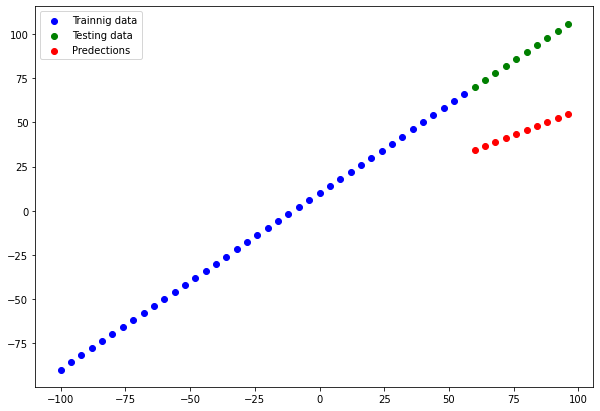

In [72]:
# Make and plot predections for model_1
y_pred_1 = model_1.predict(x_test)
plot_pred(predection= y_pred_1)

In [73]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_pred_1.squeeze()).numpy()
mse_1 = mse(y_test, y_pred_1.squeeze()).numpy()
mae_1, mse_1

(43.535328, 1919.7249)

## Build `model_2`

In [76]:
# set the random seed
tf.random.set_seed(42)

# The model amd add extra layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) #add second layer
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit The Model
model_2.fit(x_train, y_train, epochs=100 , verbose=0 )#Set the verbose 0 for less output

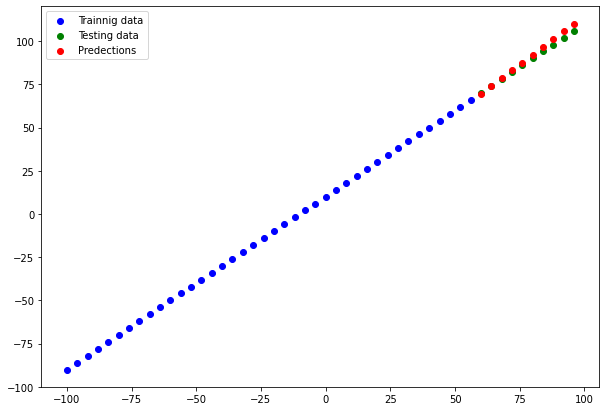

In [77]:
# Make and Plot predection
y_pred_2 = model_2.predict(x_test)
plot_pred(predection=y_pred_2)

Thats look batter alrady :)

In [79]:
# Calculate model_2 metrics

mae_2 = mae(y_test, y_pred_2.squeeze()).numpy()
mse_2 = mse(y_test, y_pred_2.squeeze()).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

## Build `model_3`

For 3rd model , i will keep evrything same as `model_2` exept i will trian for longer (500 epochs instead of 100)

This will give our model more chance to learn the pattren in the data.

In [81]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model 
model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model for more epochs
model_3.fit(x_train,y_train, epochs=500 , verbose=0)

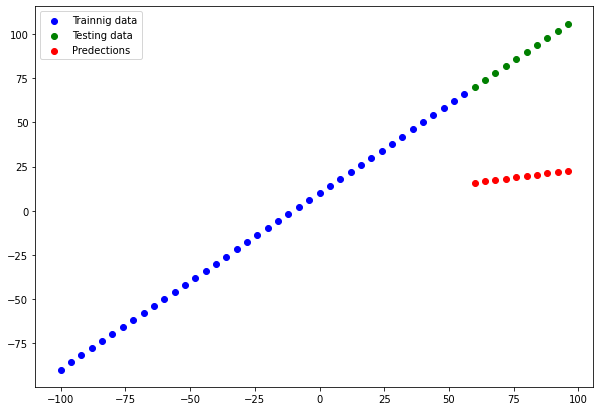

In [82]:
y_pred_3 = model_3.predict(x_test)
plot_pred(predection=y_pred_3)

I traind for longer but our model preformed worest .. !!

As it turn out , my model maight have trained too long and has thus resultd in worde result 

In [84]:
# Calculate model_3 metrics 
mae_3 = mae(y_test , y_pred_3.squeeze()).numpy()
mse_3 = mse(y_test , y_pred_3.squeeze()).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

# Comparing Result

Now we have result for 3 model similer but slightly deffrint result . i will comapre them

In [85]:
model_results = [['model_1', mae_1, mse_1],
                 ['model_2', mae_2, mse_2],
                 [',odel_3', mae_3, mse_3]]

In [86]:
import pandas as pd
all_result = pd.DataFrame(model_results,columns=['model','mae','mse'])
all_result

,model,mae,mse
0,model_1,43.535328,1919.724854
1,model_2,1.909811,5.459232
2,",odel_3",68.687859,4804.471680


# Saveing The Model

In [87]:
# Save the best model (model_2) by h5 format
model_2.save('model_2.h5')

# Loading the model

load the model and try it again

In [89]:
loaded_model_2 = tf.keras.models.load_model('model_2.h5')
loaded_model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
